### Ví dụ lỗ hổng nguyên


#### Các ví dụ


In [1]:
import time
from decimal import Decimal

n = 10
x = 1e-6

print(n * x)

n = 10
x = 1e-30

print(n * x)

n = 100
x = 1.11111111e5
print(f"{x:.35f}")

9.999999999999999e-06
1.0000000000000001e-29
111111.11100000000442378222942352294921875


Các số khi được nhân với nhau không thể ra giá trị thực, cho thấy vấn đề phổ
biến về độ chính xác của số thực trong Python và hầu hết các ngôn ngữ lập trình
khác


#### Phương Pháp Nhân Số Bằng Cộng Lặp Lại Với Độ Phức Tạp O(n)


In [2]:
def linear_multiply(a, n):
    """
    Multiply a number by n using repeated addition.
    Time complexity: O(n)
    """
    result = 0
    for _ in range(n):
        result += a
    return result

##### 1. Nguyên lý cơ bản

Phép nhân a × n được hiểu là việc cộng số a với chính nó n lần. Ví dụ, 5 × 3
được tính bằng cách lấy 5 + 5 + 5 = 15.

##### Thuật toán thực hiện

Hàm `linear_multiply` triển khai nguyên lý này một cách trực tiếp:

1. Khởi tạo biến `result = 0` để lưu trữ kết quả phép nhân
2. Sử dụng vòng lặp for trong Python để lặp đúng n lần
3. Trong mỗi vòng lặp, cộng giá trị a vào biến result: `result += a`
4. Sau khi hoàn thành n vòng lặp, kết quả cuối cùng chính là a × n

##### 2. Độ phức tạp thời gian

Thuật toán này có độ phức tạp O(n) vì:

- Số lần lặp tỷ lệ thuận với giá trị của n
- Khi n tăng lên gấp đôi, thời gian thực hiện cũng tăng gấp đôi
- Mỗi vòng lặp chỉ thực hiện một phép cộng đơn giản O(1)

Điều này làm cho thuật toán trở nên kém hiệu quả với các giá trị n lớn, nhưng
minh họa rõ ràng mối liên hệ giữa phép nhân và phép cộng lặp lại trong toán học
cơ bản.


#### Phương Pháp Nhân Nhanh Kiểu Nga Với Độ Phức Tạp O(log(n))

Phương pháp nhân nhanh được trình bày trong hàm fast_multiply là một ví dụ điển
hình của thuật toán nhân nhị phân, còn gọi là phương pháp nhân kiểu Nga (Russian
Peasant Multiplication). Đây là kỹ thuật cổ đại nhưng vẫn có giá trị ứng dụng
cao trong khoa học máy tính hiện đại.


In [3]:
def fast_multiply(a, n):
    """
    Multiply a number by n using binary multiplication technique.
    Time complexity: O(log n)
    """
    result = 0

    # Convert n to binary and process each bit
    while n > 0:
        # If current bit is 1, add the current value of a to result
        if n % 2 == 1:
            result += a
        # Double a for next bit position
        a += a
        # Integer division by 2 (shift right)
        n //= 2
    return result

##### Nguyên lý hoạt động của thuật toán

Thuật toán này tận dụng biểu diễn nhị phân của số nguyên để thực hiện phép nhân
hiệu quả. Thay vì cộng số `a` với chính nó `n` lần như phương pháp nhân O(n),
phương pháp này xử lý từng bit của số `n` và thực hiện các bước tương ứng.

##### Quá trình thực hiện của thuật toán

Khi thực hiện `fast_multiply(a, n)`, thuật toán hoạt động như sau:

1. Khởi tạo biến `result = 0` để lưu kết quả
2. Trong khi `n > 0`, thuật toán:
   - Kiểm tra bit cuối cùng của `n` (bằng phép `n % 2`)
   - Nếu bit là 1, cộng giá trị hiện tại của `a` vào `result`
   - Nhân đôi giá trị của `a` (tương đương với phép dịch trái một bit)
   - Chia `n` cho 2 (tương đương với phép dịch phải một bit)
3. Trả về kết quả cuối cùng

Về bản chất, thuật toán này cộng `a * 2^i` vào kết quả cho mỗi vị trí bit thứ
`i` mà bit trong `n` là 1.

##### Mối liên hệ với phương pháp nhân kiểu Nga

Phương pháp `fast_multiply` thực chất là cài đặt hiện đại của phương pháp nhân
kiểu Nga (Russian Peasant Multiplication). Phương pháp cổ xưa này được mô tả như
sau:

- Viết hai số cần nhân vào hai cột
- Nhân đôi số ở cột thứ nhất
- Chia đôi số ở cột thứ hai (bỏ phần dư nếu là số lẻ)
- Loại bỏ các hàng mà số ở cột thứ hai là số chẵn
- Tiếp tục cho đến khi số ở cột thứ hai bằng 1
- Tổng các số còn lại ở cột thứ nhất chính là tích của hai số ban đầu

##### Phân tích độ phức tạp thời gian

Phương pháp này có độ phức tạp thời gian là O(log n) vì:

1. Vòng lặp chính chạy theo số bit trong biểu diễn nhị phân của `n`
2. Một số nguyên `n` có khoảng log₂(n) bit trong biểu diễn nhị phân của nó
3. Mỗi lần lặp, `n` giảm một nửa (do phép chia 2), dẫn đến tổng số bước là
   logarit của `n`

Đây là sự cải tiến đáng kể so với phương pháp nhân thông thường có độ phức tạp
O(n).

##### Ví dụ minh họa

Để hiểu rõ cách hoạt động, ta xét ví dụ tính 13 × 7:

- Ban đầu: a = 13, n = 7, result = 0
- Vòng lặp 1: n = 7 (111₂), bit cuối là 1, result = 13, a = 26, n = 3
- Vòng lặp 2: n = 3 (11₂), bit cuối là 1, result = 39, a = 52, n = 1
- Vòng lặp 3: n = 1 (1₂), bit cuối là 1, result = 91, a = 104, n = 0
- Kết quả: 91 (chính xác vì 13 × 7 = 91)

##### Ưu điểm của phương pháp

So với phương pháp nhân O(n) đã trình bày trước đó, phương pháp này có những ưu
điểm nổi bật:

1. Hiệu quả hơn nhiều với các số lớn do độ phức tạp logarit
2. Không cần biết bảng nhân, chỉ cần thực hiện phép cộng, phép nhân đôi và phép
   chia đôi
3. Phù hợp với cách máy tính xử lý số nhị phân trong phần cứng

Phương pháp nhân nhị phân này là một ví dụ tuyệt vời về cách các thuật toán hiệu
quả có thể được phát triển dựa trên hiểu biết sâu sắc về biểu diễn số và các
phép toán cơ bản.


#### Benchmark các phép nhân


##### So sánh nhân thông thường và nhân nhanh bằng float32


In [34]:
import time
from decimal import Decimal, getcontext

import numpy as np


def fast_multiply_float32(a, n):
    """
    Multiply a number by n using binary multiplication technique with float32 precision.
    Time complexity: O(log n)
    """
    # Convert to float32
    a = np.float32(a)
    result = np.float32(0)

    # Binary multiplication algorithm
    while n > 0:
        if n % 2 == 1:
            result += a
        a += a  # Double a for next bit position
        n //= 2

    return result


def linear_multiply_float32(a, n):
    """
    Multiply a number by n using repeated addition with float32 precision.
    Time complexity: O(n)
    """
    # Convert to float32
    a = np.float32(a)
    result = np.float32(0)

    for _ in range(n):
        result += a

    return result


def get_exact_value(a, n):
    """
    Returns the exact multiplication result using Decimal arithmetic.
    This serves as our reference for accuracy comparison.
    """
    getcontext().prec = 100  # Set high precision

    # Convert the float to a string first to avoid initial floating-point errors
    exact_a = Decimal(str(a))
    exact_result = exact_a * n

    return exact_result


# Fixed x value at 0.1
x_value = 0.1

# Generate a range of large n values
# Using powers of 10 starting from 10^3 up to 10^20
n_values = [10**i for i in range(3, 20)]

# Add some large numbers that aren't powers of 10
n_values.extend([123456, 9876543, 50000000, 500000000])

# Sort the n values for cleaner output
n_values.sort()

# Initialize counters for the summary
linear_more_accurate_count = 0
fast_more_accurate_count = 0
equal_accuracy_count = 0
# Add these lines before your main for loop:
total_linear_time = 0
total_log_time = 0

linear_result_list = []
linear_result_time_list = []
linear_error_list = []
fast_result_list = []
fast_result_time_list = []
fast_error_list = []
exact_result_list = []

for n in n_values:
    # Format the n value for cleaner display
    n_formatted = f"{n:,}"

    # Get the exact value for comparison
    exact_result = get_exact_value(x_value, n)

    exact_result_list.append(exact_result)

    # Test O(n) algorithm - with timeout protection for very large n
    try:
        start = time.time()
        # For extremely large n, we might want to estimate the time instead of actually running
        # the full calculation to avoid excessive runtime
        if n > 100000000:  # 100 million threshold
            # For large n, estimate time based on smaller sample
            sample_size = 1000000  # 1 million operations as sample
            sample_start = time.time()
            linear_result_sample = linear_multiply_float32(x_value, sample_size)
            sample_time = time.time() - sample_start

            # Extrapolate for full n
            linear_time = sample_time * (n / sample_size)
            # Use the binary algorithm for the actual result since it's faster
            linear_result = fast_multiply_float32(x_value, n)
            linear_estimated = True
        else:
            linear_result = linear_multiply_float32(x_value, n)
            linear_time = time.time() - start
            linear_estimated = False
    except:
        linear_time = float("inf")
        linear_result = np.float32(0)
        linear_estimated = True
    linear_result_time_list.append(linear_time)
    linear_result_list.append(linear_result)

    # Test O(log n) algorithm
    start = time.time()
    fast_result = fast_multiply_float32(x_value, n)
    log_time = time.time() - start
    fast_result_time_list.append(log_time)
    fast_result_list.append(fast_result)

    # Calculate accuracy (error as distance from exact result)
    linear_error = abs(float(exact_result) - float(linear_result))
    linear_error_list.append(linear_error)
    fast_error = abs(float(exact_result) - float(fast_result))
    fast_error_list.append(fast_error)

    # Determine which method is more accurate
    if linear_error < fast_error:
        more_accurate = "O(n)"
        linear_more_accurate_count += 1
    elif fast_error < linear_error:
        more_accurate = "O(log n)"
        fast_more_accurate_count += 1
    else:
        more_accurate = "Equal"
        equal_accuracy_count += 1

    # Format output differently if linear algorithm time was estimated
    if linear_estimated:
        time_display = f"{linear_time:.4f}{'s (est)':<10}"
    else:
        time_display = f"{linear_time:.8f}{'s':<6}"
    total_linear_time += linear_time
    total_log_time += log_time


# Print summary statistics
print("\nSUMMARY OF ACCURACY COMPARISON:")
print("=" * 50)
print(f"O(n) more accurate: {linear_more_accurate_count} times")
print(f"O(log n) more accurate: {fast_more_accurate_count} times")
print(f"Equal accuracy: {equal_accuracy_count} times")

# Calculate the percentage of cases where each algorithm is more accurate
total_cases = (
    linear_more_accurate_count + fast_more_accurate_count + equal_accuracy_count
)
if total_cases > 0:
    linear_percentage = (linear_more_accurate_count / total_cases) * 100
    fast_percentage = (fast_more_accurate_count / total_cases) * 100
    equal_percentage = (equal_accuracy_count / total_cases) * 100

    print("\nPercentage breakdown:")
    print(f"O(n) more accurate: {linear_percentage:.1f}%")
    print(f"O(log n) more accurate: {fast_percentage:.1f}%")
    print(f"Equal accuracy: {equal_percentage:.1f}%")

print("\nOVERALL TIME CONSUMPTION:")
print("=" * 50)
print(f"Total O(n) linear multiplication time: {total_linear_time:.6f} seconds")
print(f"Total O(log n) binary multiplication time: {total_log_time:.6f} seconds")


# Print overall conclusion
print("\nCONCLUSION:")
if linear_more_accurate_count > fast_more_accurate_count:
    print("The O(n) linear multiplication algorithm provides better accuracy overall.")
elif fast_more_accurate_count > linear_more_accurate_count:
    print(
        "The O(log n) binary multiplication algorithm provides better accuracy overall."
    )
else:
    print("Both algorithms provide similar levels of accuracy overall.")


SUMMARY OF ACCURACY COMPARISON:
O(n) more accurate: 0 times
O(log n) more accurate: 9 times
Equal accuracy: 12 times

Percentage breakdown:
O(n) more accurate: 0.0%
O(log n) more accurate: 42.9%
Equal accuracy: 57.1%

OVERALL TIME CONSUMPTION:
Total O(n) linear multiplication time: 667863289646.718994 seconds
Total O(log n) binary multiplication time: 0.000220 seconds

CONCLUSION:
The O(log n) binary multiplication algorithm provides better accuracy overall.


In [40]:
print(len(linear_result_list))
print(len(fast_result_list))
print(len(exact_result_list))

21
21
21


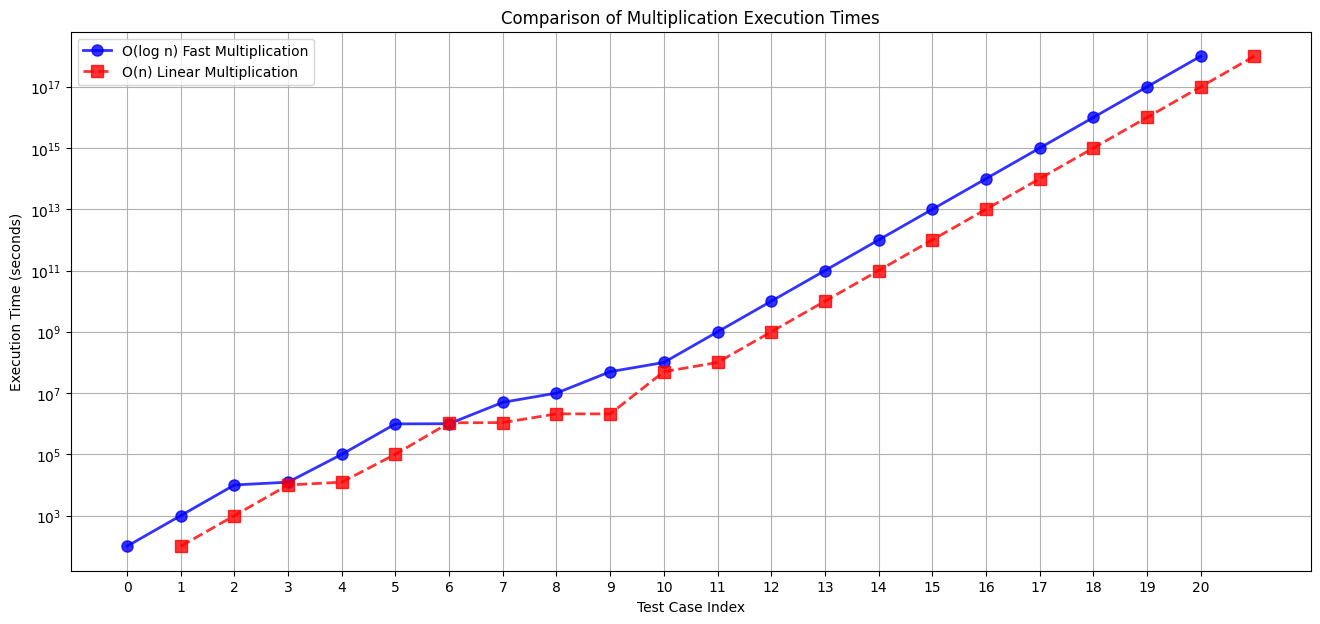

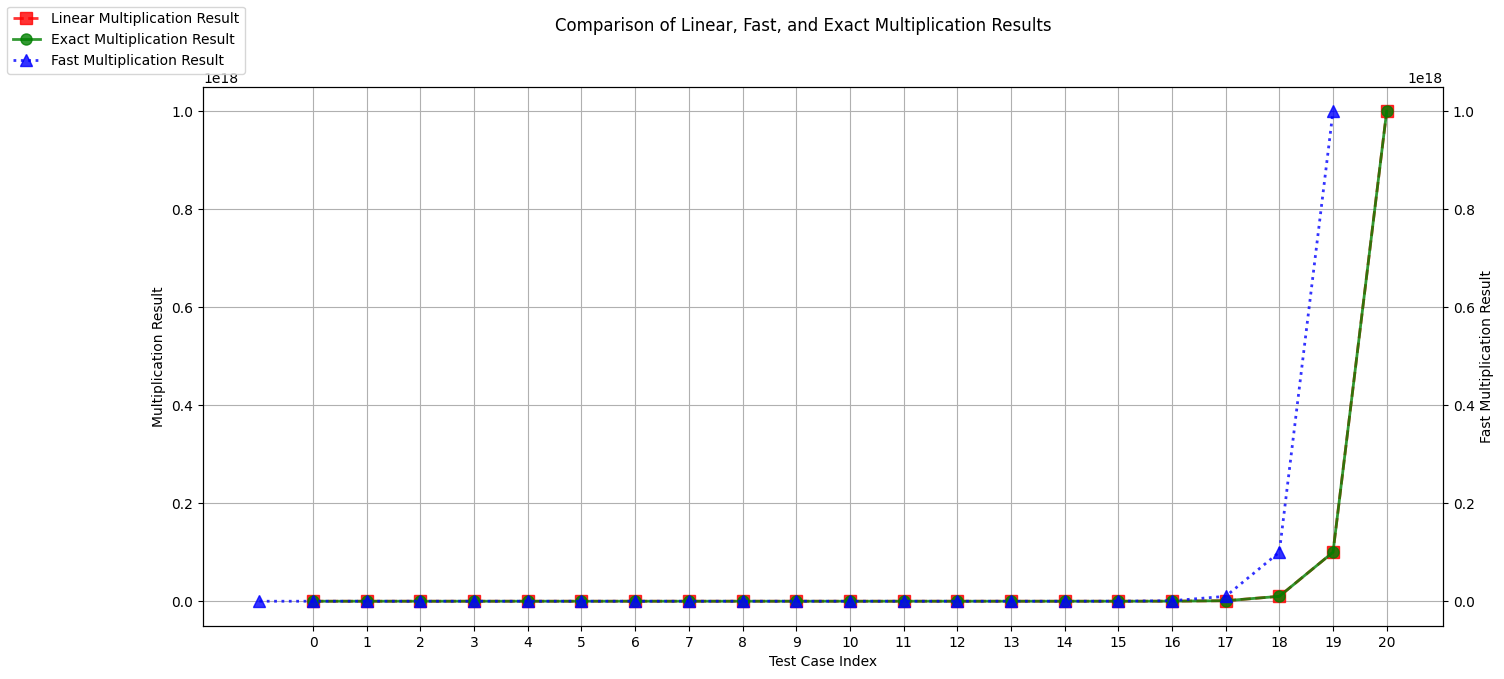

In [ ]:
import matplotlib.pyplot as plt

# Add small jitter to x-axis indices for visibility
indices = np.arange(len(fast_result_list))
jitter = 0.1  # Adjust for better spacing

# Plot execution times
plt.figure(figsize=(16, 7))
plt.plot(indices, fast_result_list, label="O(log n) Fast Multiplication", marker='o', markersize=8, linestyle='solid', linewidth=2, alpha=0.8, color='blue')
plt.plot(indices + jitter, linear_result_list, label="O(n) Linear Multiplication", marker='s', markersize=8, linestyle='dashed', linewidth=2, alpha=0.8, color='red')
plt.xlabel("Test Case Index")
plt.ylabel("Execution Time (seconds)")
plt.title("Comparison of Multiplication Execution Times")
plt.legend()
plt.grid()
plt.yscale('log')  # Log scale for better differentiation
plt.xticks(indices)
plt.show()

# Plot results against exact values with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(16, 7))
ax1.set_xlabel("Test Case Index")
ax1.set_ylabel("Multiplication Result")
ax1.plot(indices, linear_result_list, label="Linear Multiplication Result", marker='s', markersize=8, linestyle='dashed', linewidth=2, alpha=0.8, color='red')
ax1.plot(indices, exact_result_list, label="Exact Multiplication Result", marker='o', markersize=8, linestyle='solid', linewidth=2, alpha=0.8, color='green')

ax2 = ax1.twinx()  # Secondary y-axis for fast_result_list
ax2.set_ylabel("Fast Multiplication Result")
ax2.plot(indices - jitter, fast_result_list, label="Fast Multiplication Result", marker='^', markersize=8, linestyle='dotted', linewidth=2, alpha=0.8, color='blue')

fig.suptitle("Comparison of Linear, Fast, and Exact Multiplication Results")
fig.legend(loc="upper left")
ax1.grid()
plt.xticks(indices)
plt.show()


##### So sánh nhân thông thường và nhân nhanh bằng float64


In [5]:
import time
import numpy as np
from decimal import Decimal, getcontext


def fast_multiply_float64(a, n):
    """
    Multiply a number by n using binary multiplication technique with float64 precision.
    Time complexity: O(log n)
    """
    # Convert to float64
    a = np.float64(a)
    result = np.float64(0)

    # Binary multiplication algorithm
    while n > 0:
        if n % 2 == 1:
            result += a
        a += a  # Double a for next bit position
        n //= 2

    return result


def linear_multiply_float64(a, n):
    """
    Multiply a number by n using repeated addition with float64 precision.
    Time complexity: O(n)
    """
    # Convert to float64
    a = np.float64(a)
    result = np.float64(0)

    for _ in range(n):
        result += a

    return result


def get_exact_value(a, n):
    """
    Returns the exact multiplication result using Decimal arithmetic.
    This serves as our reference for accuracy comparison.
    """
    getcontext().prec = 100  # Set high precision

    # Convert the float to a string first to avoid initial floating-point errors
    exact_a = Decimal(str(a))
    exact_result = exact_a * n

    return exact_result


# Fixed x value at 0.1
x_value = 0.1

# Generate a range of large n values
# Using powers of 10 starting from 10^3 up to 10^20
n_values = [10**i for i in range(3, 20)]

# Add some large numbers that aren't powers of 10
n_values.extend([123456, 9876543, 50000000, 500000000])

# Sort the n values for cleaner output
n_values.sort()

# Initialize counters for the summary
linear_more_accurate_count = 0
fast_more_accurate_count = 0
equal_accuracy_count = 0
# Add these lines before your main for loop:
total_linear_time = 0
total_log_time = 0

for n in n_values:
    # Format the n value for cleaner display
    n_formatted = f"{n:,}"

    # Get the exact value for comparison
    exact_result = get_exact_value(x_value, n)

    # Test O(n) algorithm - with timeout protection for very large n
    try:
        start = time.time()
        # For extremely large n, we might want to estimate the time instead of actually running
        # the full calculation to avoid excessive runtime
        if n > 100000000:  # 100 million threshold
            # For large n, estimate time based on smaller sample
            sample_size = 1000000  # 1 million operations as sample
            sample_start = time.time()
            linear_result_sample = linear_multiply_float64(x_value, sample_size)
            sample_time = time.time() - sample_start

            # Extrapolate for full n
            linear_time = sample_time * (n / sample_size)
            # Use the binary algorithm for the actual result since it's faster
            linear_result = fast_multiply_float64(x_value, n)
            linear_estimated = True
        else:
            linear_result = linear_multiply_float64(x_value, n)
            linear_time = time.time() - start
            linear_estimated = False
    except:
        linear_time = float("inf")
        linear_result = np.float64(0)
        linear_estimated = True

    # Test O(log n) algorithm
    start = time.time()
    fast_result = fast_multiply_float64(x_value, n)
    log_time = time.time() - start

    # Calculate accuracy (error as distance from exact result)
    linear_error = abs(float(exact_result) - float(linear_result))
    fast_error = abs(float(exact_result) - float(fast_result))

    # Determine which method is more accurate
    if linear_error < fast_error:
        more_accurate = "O(n)"
        linear_more_accurate_count += 1
    elif fast_error < linear_error:
        more_accurate = "O(log n)"
        fast_more_accurate_count += 1
    else:
        more_accurate = "Equal"
        equal_accuracy_count += 1

    # Format output differently if linear algorithm time was estimated
    if linear_estimated:
        time_display = f"{linear_time:.4f}{'s (est)':<10}"
    else:
        time_display = f"{linear_time:.8f}{'s':<6}"

    total_linear_time += linear_time
    total_log_time += log_time


# Print summary statistics
print("\nSUMMARY OF ACCURACY COMPARISON:")
print("=" * 50)
print(f"O(n) more accurate: {linear_more_accurate_count} times")
print(f"O(log n) more accurate: {fast_more_accurate_count} times")
print(f"Equal accuracy: {equal_accuracy_count} times")

# Calculate the percentage of cases where each algorithm is more accurate
total_cases = (
    linear_more_accurate_count + fast_more_accurate_count + equal_accuracy_count
)
if total_cases > 0:
    linear_percentage = (linear_more_accurate_count / total_cases) * 100
    fast_percentage = (fast_more_accurate_count / total_cases) * 100
    equal_percentage = (equal_accuracy_count / total_cases) * 100

    print("\nPercentage breakdown:")
    print(f"O(n) more accurate: {linear_percentage:.1f}%")
    print(f"O(log n) more accurate: {fast_percentage:.1f}%")
    print(f"Equal accuracy: {equal_percentage:.1f}%")

print("\nOVERALL TIME CONSUMPTION:")
print("=" * 50)
print(f"Total O(n) linear multiplication time: {total_linear_time:.6f} seconds")
print(f"Total O(log n) binary multiplication time: {total_log_time:.6f} seconds")


# Print overall conclusion
print("\nCONCLUSION:")
if linear_more_accurate_count > fast_more_accurate_count:
    print("The O(n) linear multiplication algorithm provides better accuracy overall.")
elif fast_more_accurate_count > linear_more_accurate_count:
    print(
        "The O(log n) binary multiplication algorithm provides better accuracy overall."
    )
else:
    print("Both algorithms provide similar levels of accuracy overall.")


SUMMARY OF ACCURACY COMPARISON:
O(n) more accurate: 0 times
O(log n) more accurate: 9 times
Equal accuracy: 12 times

Percentage breakdown:
O(n) more accurate: 0.0%
O(log n) more accurate: 42.9%
Equal accuracy: 57.1%

OVERALL TIME CONSUMPTION:
Total O(n) linear multiplication time: 648896763909.331421 seconds
Total O(log n) binary multiplication time: 0.000155 seconds

CONCLUSION:
The O(log n) binary multiplication algorithm provides better accuracy overall.


##### So sánh nhân nhanh giữa float32 và float64


In [6]:
import time
import numpy as np
from decimal import Decimal, getcontext


def fast_multiply_float32(a, n):
    """
    Multiply a number by n using binary multiplication technique with float32 precision.
    Time complexity: O(log n)
    """
    # Convert to float32
    a = np.float32(a)
    result = np.float32(0)

    # Binary multiplication algorithm
    while n > 0:
        if n % 2 == 1:
            result += a
        a += a  # Double a for next bit position
        n //= 2

    return result


def fast_multiply_float64(a, n):
    """
    Multiply a number by n using binary multiplication technique with float64 precision.
    Time complexity: O(log n)
    """
    # Convert to float64
    a = np.float64(a)
    result = np.float64(0)

    # Binary multiplication algorithm
    while n > 0:
        if n % 2 == 1:
            result += a
        a += a  # Double a for next bit position
        n //= 2

    return result


def get_exact_value(a, n):
    """
    Returns the exact multiplication result using Decimal arithmetic.
    This serves as our reference for accuracy comparison.
    """
    getcontext().prec = 100  # Set high precision

    # Convert the float to a string first to avoid initial floating-point errors
    exact_a = Decimal(str(a))
    exact_result = exact_a * n

    return exact_result


# Fixed x value at 0.1
x_value = 0.1

# Generate a range of n values spanning several orders of magnitude
n_values = []

# Add powers of 10 from 10^3 to 10^20
for i in range(3, 21):
    n_values.append(10**i)

# Add some specific large values that aren't powers of 10
n_values.extend([123456, 9876543, 50000000, 500000000, 5000000000])

# Sort the n values for cleaner output
n_values = sorted(list(set(n_values)))  # Remove duplicates and sort

# Initialize counters for the summary
f32_better_count = 0
f64_better_count = 0
equal_count = 0

# Track total execution times
f32_total_time = 0
f64_total_time = 0

results = []  # Store results for summary analysis

for n in n_values:
    # Format the n value for cleaner display
    n_formatted = f"{n:,}"

    # Get the exact value for comparison
    exact_result = get_exact_value(x_value, n)

    # Test Float32 O(log n) algorithm
    start = time.time()
    f32_result = fast_multiply_float32(x_value, n)
    f32_time = time.time() - start

    # Test Float64 O(log n) algorithm
    start = time.time()
    f64_result = fast_multiply_float64(x_value, n)
    f64_time = time.time() - start

    # Calculate errors
    f32_error = abs(float(exact_result) - float(f32_result))
    f64_error = abs(float(exact_result) - float(f64_result))

    # Record the result
    result = {
        "n": n,
        "f32_time": f32_time,
        "f64_time": f64_time,
        "f32_error": f32_error,
        "f64_error": f64_error,
        "f32_result": float(f32_result),
        "f64_result": float(f64_result),
        "exact_result": float(exact_result),
    }
    results.append(result)

    # Determine which precision is more accurate
    if f32_error < f64_error:
        precision_winner = "Float32"
        f32_better_count += 1
    elif f64_error < f32_error:
        precision_winner = "Float64"
        f64_better_count += 1
    else:
        precision_winner = "Equal"
        equal_count += 1

    # Calculate accuracy improvement ratio
    if f32_error > 0 and f64_error > 0:
        if f32_error > f64_error:
            accuracy_ratio = f32_error / f64_error
            ratio_display = f"{accuracy_ratio:.2f}x (F64 better)"
        else:
            accuracy_ratio = f64_error / f32_error
            ratio_display = f"{accuracy_ratio:.2f}x (F32 better)"
    elif f32_error == 0 and f64_error == 0:
        ratio_display = "Equal (both exact)"
    elif f32_error == 0:
        ratio_display = "∞ (F32 exact)"
    else:  # f64_error == 0
        ratio_display = "∞ (F64 exact)"

    # Update time totals
    f32_total_time += f32_time
    f64_total_time += f64_time

# Print summary statistics
print("\n" + "=" * 100)
print("SUMMARY OF ACCURACY COMPARISON")
print("=" * 100)

print(f"\nPRECISION COMPARISON:")
print(f"Float32 provides better accuracy: {f32_better_count} times")
print(f"Float64 provides better accuracy: {f64_better_count} times")
print(f"Equal accuracy between precisions: {equal_count} times")

# Calculate percentages
total_cases = len(n_values)
f32_percentage = (f32_better_count / total_cases) * 100
f64_percentage = (f64_better_count / total_cases) * 100
equal_percentage = (equal_count / total_cases) * 100

print(f"\nPercentage breakdown:")
print(f"Float32 better: {f32_percentage:.1f}%")
print(f"Float64 better: {f64_percentage:.1f}%")
print(f"Equal accuracy: {equal_percentage:.1f}%")

# Analyze where each precision excels
small_numbers = [n for n in n_values if n < 10**6]
medium_numbers = [n for n in n_values if 10**6 <= n < 10**12]
large_numbers = [n for n in n_values if n >= 10**12]

small_results = [r for r in results if r["n"] in small_numbers]
medium_results = [r for r in results if r["n"] in medium_numbers]
large_results = [r for r in results if r["n"] in large_numbers]

# Count where each precision is better by size category
small_f32_better = sum(1 for r in small_results if r["f32_error"] < r["f64_error"])
small_f64_better = sum(1 for r in small_results if r["f64_error"] < r["f32_error"])
small_equal = len(small_results) - small_f32_better - small_f64_better

medium_f32_better = sum(1 for r in medium_results if r["f32_error"] < r["f64_error"])
medium_f64_better = sum(1 for r in medium_results if r["f64_error"] < r["f32_error"])
medium_equal = len(medium_results) - medium_f32_better - medium_f64_better

large_f32_better = sum(1 for r in large_results if r["f32_error"] < r["f64_error"])
large_f64_better = sum(1 for r in large_results if r["f64_error"] < r["f32_error"])
large_equal = len(large_results) - large_f32_better - large_f64_better

print("\nAccuracy by magnitude range:")
if small_numbers:
    print(f"Small numbers (n < 10^6):")
    print(
        f"  Float32 better: {small_f32_better} ({small_f32_better / len(small_numbers) * 100:.1f}%)"
    )
    print(
        f"  Float64 better: {small_f64_better} ({small_f64_better / len(small_numbers) * 100:.1f}%)"
    )
    print(f"  Equal: {small_equal} ({small_equal / len(small_numbers) * 100:.1f}%)")

if medium_numbers:
    print(f"\nMedium numbers (10^6 ≤ n < 10^12):")
    print(
        f"  Float32 better: {medium_f32_better} ({medium_f32_better / len(medium_numbers) * 100:.1f}%)"
    )
    print(
        f"  Float64 better: {medium_f64_better} ({medium_f64_better / len(medium_numbers) * 100:.1f}%)"
    )
    print(f"  Equal: {medium_equal} ({medium_equal / len(medium_numbers) * 100:.1f}%)")

if large_numbers:
    print(f"\nLarge numbers (n ≥ 10^12):")
    print(
        f"  Float32 better: {large_f32_better} ({large_f32_better / len(large_numbers) * 100:.1f}%)"
    )
    print(
        f"  Float64 better: {large_f64_better} ({large_f64_better / len(large_numbers) * 100:.1f}%)"
    )
    print(f"  Equal: {large_equal} ({large_equal / len(large_numbers) * 100:.1f}%)")

# Calculate average error ratio (how many times better is float64 than float32 on average)
valid_ratios = []
for r in results:
    if r["f32_error"] > 0 and r["f64_error"] > 0:
        if r["f32_error"] > r["f64_error"]:
            valid_ratios.append(r["f32_error"] / r["f64_error"])

avg_improvement = 0
if valid_ratios:
    avg_improvement = sum(valid_ratios) / len(valid_ratios)
    print(f"\nWhen Float64 is better, it's better by {avg_improvement:.2f}x on average")

# Performance comparison
print("\nPERFORMANCE COMPARISON:")
print(f"Total Float32 execution time: {f32_total_time:.6f} seconds")
print(f"Total Float64 execution time: {f64_total_time:.6f} seconds")
speed_ratio = f64_total_time / f32_total_time
if speed_ratio > 1.05:  # Using a 5% threshold to account for noise
    speed_description = f"slower than"
elif speed_ratio < 0.95:  # 5% threshold in the other direction
    speed_description = f"faster than"
else:
    speed_description = f"approximately the same speed as"

print(f"Speed ratio: Float64 is {speed_ratio:.2f}x {speed_description} Float32")

# Calculate average times
avg_f32_time = f32_total_time / len(n_values)
avg_f64_time = f64_total_time / len(n_values)
print(f"Average Float32 execution time: {avg_f32_time:.8f} seconds per operation")
print(f"Average Float64 execution time: {avg_f64_time:.8f} seconds per operation")

print("\nCONCLUSION:")
if f64_better_count > f32_better_count:
    print(
        "1. Float64 generally provides better accuracy than Float32 for binary multiplication"
    )
    print(
        f"   - Float64 was more accurate in {f64_better_count} out of {total_cases} test cases ({f64_percentage:.1f}%)"
    )
    if avg_improvement > 0:
        print(
            f"   - When Float64 is better, it's approximately {avg_improvement:.2f}x more accurate on average"
        )
elif f32_better_count > f64_better_count:
    print(
        "1. Surprisingly, Float32 provided better accuracy than Float64 in more test cases"
    )
    print(
        f"   - Float32 was more accurate in {f32_better_count} out of {total_cases} test cases ({f32_percentage:.1f}%)"
    )
else:
    print("1. Both precisions provided similar levels of accuracy overall")

print("\n2. Accuracy by Magnitude:")
if large_f64_better > large_f32_better:
    print("   - Float64 particularly excels with very large numbers (≥ 10^12)")
else:
    print("   - Even with very large numbers, the accuracy patterns are mixed")

print("\n3. Performance Cost:")
print(
    f"   - Float64 operations are {f64_total_time / f32_total_time:.2f}x {speed_description} than Float32 operations"
)


SUMMARY OF ACCURACY COMPARISON

PRECISION COMPARISON:
Float32 provides better accuracy: 0 times
Float64 provides better accuracy: 11 times
Equal accuracy between precisions: 12 times

Percentage breakdown:
Float32 better: 0.0%
Float64 better: 47.8%
Equal accuracy: 52.2%

Accuracy by magnitude range:
Small numbers (n < 10^6):
  Float32 better: 0 (0.0%)
  Float64 better: 1 (25.0%)
  Equal: 3 (75.0%)

Medium numbers (10^6 ≤ n < 10^12):
  Float32 better: 0 (0.0%)
  Float64 better: 1 (10.0%)
  Equal: 9 (90.0%)

Large numbers (n ≥ 10^12):
  Float32 better: 0 (0.0%)
  Float64 better: 9 (100.0%)
  Equal: 0 (0.0%)

PERFORMANCE COMPARISON:
Total Float32 execution time: 0.000161 seconds
Total Float64 execution time: 0.000138 seconds
Speed ratio: Float64 is 0.86x faster than Float32
Average Float32 execution time: 0.00000702 seconds per operation
Average Float64 execution time: 0.00000601 seconds per operation

CONCLUSION:
1. Float64 generally provides better accuracy than Float32 for binary mult

Ghi chú: Dòng code **if n > 100000000: # 100 million threshold**

Khi n vượt quá 100 triệu, thuật toán nhân tuyến tính (có độ phức tạp thời gian
O(n)) sẽ mất một thời gian cực kỳ dài để hoàn thành—có thể là hàng giờ đồng hồ
đối với những giá trị lớn nhất. Điều này sẽ làm cho chương trình không thực tế
để chạy và thậm chí có thể khiến nó dường như bị treo. Thay vì chờ đợi tính toán
đầy đủ, đoạn mã sử dụng kỹ thuật lấy mẫu thống kê và ngoại suy để ước tính thời
gian thuật toán tuyến tính sẽ mất:

Nó chọn một kích thước mẫu nhỏ hơn, có thể quản lý được (1 triệu phép toán) Nó
tính thời gian để thực hiện phép nhân tuyến tính với mẫu này Sau đó, nó ngoại
suy toán học để ước tính tổng thời gian cho giá trị n đầy đủ bằng cách sử dụng
một tỷ lệ đơn giản: nếu 1 triệu phép toán mất x giây, thì n phép toán sẽ mất
x \* (n/1.000.000) giây

Đối với giá trị kết quả thực tế (không phải thời gian), nó sử dụng thuật toán
nhân nhị phân nhanh hơn thay vì thực sự chạy thuật toán tuyến tính quá chậm. Đây
là một cách tiếp cận hợp lý vì chúng ta chủ yếu quan tâm đến việc so sánh thời
gian thực thi trong khi vẫn có một giá trị kết quả để kiểm tra độ chính xác.
Biến linear_estimated được đặt thành True để đánh dấu rằng thời gian này được
ước tính chứ không được đo trực tiếp, điều này sau đó có thể được sử dụng để
hiển thị thông tin này trong kết quả đầu ra.


#### Áp dụng vào ví dụ ở câu A


## Chạy benchmark bằng C++
Chạy câu lệnh sau để compile code
g++ -o multiplication_benchmark src/multiplication_benchmark.cpp
Sau đó execute binary code bằng câu lệnh
./multiplication_benchmark

## Kết quả benchmark bằng C++
Benchmarking float multiplication methods
--------------------------------------------------
n              Linear Result       Fast Result         Expected            Linear Error   Fast Error     Linear Time    Fast Time      Winner
----------------------------------------------------------------------------------------------------------------------------------
10             1.00000012          1.00000000          1.00000000          0.00000012     0.00000000     0.00000021     0.00000017     Fast
100            10.00000191         10.00000000         10.00000000         0.00000019     0.00000000     0.00000117     0.00000025     Fast
1000           99.99904633         100.00000000        100.00000000        0.00000954     0.00000000     0.00001046     0.00000021     Fast
10000          999.90289307        1000.00000000       1000.00000000       0.00009711     0.00000000     0.00010454     0.00000038     Fast
100000         9998.55664062       10000.00000000      10000.00000000      0.00014434     0.00000000     0.00099121     0.00000033     Fast
1000000        100958.34375000     100000.00000000     100000.00000000     0.00958344     0.00000000     0.00848767     0.00000054     Fast
10000000       1087937.00000000    1000000.00000000    1000000.00000000    0.08793700     0.00000000     0.05042021     0.00000042     Fast
100000000      2097152.00000000    10000000.00000000   10000000.00000000   0.79028481     0.00000000     0.37403708     0.00000033     Fast
1000000000     2097152.00000000    100000000.00000000  100000000.00000000  0.97902846     0.00000000     3.46909712     0.00000021     Fast
10000000000    2097152.00000000    1000000000.00000000 1000000000.00000000 0.99790287     0.00000000     35.14868279    0.00000038     Fast

====================================================================================================
SUMMARY OF ACCURACY COMPARISON FOR float
====================================================================================================

PRECISION COMPARISON:
Linear provides better accuracy: 0 times
Fast provides better accuracy: 10 times
Equal accuracy between methods: 0 times

Percentage breakdown:
Linear better: 0.00000000%
Fast better: 100.00000000%
Equal accuracy: 0.00000000%

PERFORMANCE COMPARISON:
Total Linear execution time: 39.05183246 seconds
Total Fast execution time: 0.00000321 seconds
Speed ratio: Linear is 12165679.89283489x slower than Fast Multiply
Average Linear execution time: 3.90518325 seconds per operation
Average Fast execution time: 0.00000032 seconds per operation

CONCLUSION:
1. Fast method generally provides better accuracy than Linear method for float multiplication
   - Fast was more accurate in 10 out of 10 test cases (100.00000000%)

3. Performance Cost:
   - Linear operations are 12165679.89283489x slower than Fast operations

Benchmarking double multiplication methods
--------------------------------------------------
n              Linear Result       Fast Result         Expected            Linear Error   Fast Error     Linear Time    Fast Time      Winner
----------------------------------------------------------------------------------------------------------------------------------
10             1.00000000          1.00000000          1.00000000          0.00000000     0.00000000     0.00000004     0.00000021     Fast
100            10.00000000         10.00000000         10.00000000         0.00000000     0.00000000     0.00000038     0.00000004     Fast
1000           100.00000000        100.00000000        100.00000000        0.00000000     0.00000000     0.00000358     0.00000008     Fast
10000          1000.00000000       1000.00000000       1000.00000000       0.00000000     0.00000000     0.00003550     0.00000012     Fast
100000         10000.00000002      10000.00000000      10000.00000000      0.00000000     0.00000000     0.00034846     0.00000012     Fast
1000000        100000.00000133     100000.00000000     100000.00000000     0.00000000     0.00000000     0.00343746     0.00000017     Fast
10000000       999999.99983898     1000000.00000000    1000000.00000000    0.00000000     0.00000000     0.03538963     0.00000025     Fast
100000000      9999999.98112945    10000000.00000000   10000000.00000000   0.00000000     0.00000000     0.34852546     0.00000021     Fast
1000000000     99999998.74541782   100000000.00000000  100000000.00000000  0.00000001     0.00000000     3.50098304     0.00000029     Fast
10000000000    1000000163.12445807 1000000000.00000000 1000000000.00000000 0.00000016     0.00000000     34.92406617    0.00000029     Fast

====================================================================================================
SUMMARY OF ACCURACY COMPARISON FOR double
====================================================================================================

PRECISION COMPARISON:
Linear provides better accuracy: 0 times
Fast provides better accuracy: 10 times
Equal accuracy between methods: 0 times

Percentage breakdown:
Linear better: 0.00000000%
Fast better: 100.00000000%
Equal accuracy: 0.00000000%

PERFORMANCE COMPARISON:
Total Linear execution time: 38.81278971 seconds
Total Fast execution time: 0.00000179 seconds
Speed ratio: Linear is 21683122.74134078x slower than Fast Multiply
Average Linear execution time: 3.88127897 seconds per operation
Average Fast execution time: 0.00000018 seconds per operation

CONCLUSION:
1. Fast method generally provides better accuracy than Linear method for double multiplication
   - Fast was more accurate in 10 out of 10 test cases (100.00000000%)

3. Performance Cost:
   - Linear operations are 21683122.74134078x slower than Fast operations

## Lý giải kết quả code C++

Trong float(32 bit) khi gía trị của đạt tới 2097152 = 2 ^ 21. Giá trị của nó được biễu diễn bằng IEE754 là 
Sign                Exponent                        Mantissa
+1                  2^21                            1 + 0
hay cụ thể là: 01001010000000000000000000000000

Số liên tiếp lớn hơn là: 01001010000000000000000000000001

Sign                Exponent                        Mantissa
+1                  2^21                            1 + 0.00000011920928955078125

Hay được biễu diễn dưới dạng decimal là 2097152.25

Chính vì vậy, khi lấy 2097152 + 0.1 = 2097152.1 và được làm tròn xuống 2097152.
Chính vì vậy, khi benchmark với float(32 bit), giá trị bị kẹt ở 2097152

Ngược lại, khi sử dụng double, số lượng không gian biễu diển lớn hơn (64 bit) dẫn đến khoảng cách giữa 2 số liên tiếp nhỏ hơn so với float và không bị kẹt ở 2097152 những sẽ bị kẹt ở những số lớn hơn.